In [73]:
# Calculate On Balance Volume (OBV) technical indicator

# Import necesary libraries
import yfinance as yf
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import pyplot
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)

In [63]:
# Download historical data for required stocks
ticker = "FB"
ohlcv = yf.download(ticker,dt.date.today()-dt.timedelta(1825),dt.datetime.today())

[*********************100%***********************]  1 of 1 completed


In [64]:
DF = ohlcv.copy()
DF

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-05-03,117.519997,118.160004,117.019997,117.430000,117.430000,24117500
2016-05-04,116.610001,118.300003,116.570000,118.059998,118.059998,23448400
2016-05-05,118.040001,118.980003,117.250000,117.809998,117.809998,22056700
2016-05-06,117.160004,119.639999,117.110001,119.489998,119.489998,26395600
2016-05-09,119.540001,120.279999,118.900002,119.239998,119.239998,21138100
...,...,...,...,...,...,...
2021-04-26,303.339996,305.799988,301.559998,303.040009,303.040009,16172600
2021-04-27,304.279999,305.339996,301.109985,303.570007,303.570007,15309300
2021-04-28,307.359985,310.920013,305.369995,307.100006,307.100006,33907200


In [92]:
def OBV(DF):
    """function to calculate On Balance Volume"""
    df = DF.copy()
    df['daily_ret'] = df['Adj Close'].pct_change()
    df['direction'] = np.where(df['daily_ret']>=0,1,-1)
    df.loc['2016-05-03', 'direction'] = 0 # First Row
    df['vol_adj'] = df['Volume'] * df['direction']
    df['obv'] = df['vol_adj'].cumsum()
    return df

In [69]:
df_obv = OBV(DF)
df_obv

,Open,High,Low,Close,Adj Close,Volume,daily_ret,direction,vol_adj,obv
Date,,,,,,,,,,
2016-05-03,117.519997,118.160004,117.019997,117.430000,117.430000,24117500,NaN,0,0,0
2016-05-04,116.610001,118.300003,116.570000,118.059998,118.059998,23448400,0.005365,1,23448400,23448400
2016-05-05,118.040001,118.980003,117.250000,117.809998,117.809998,22056700,-0.002118,-1,-22056700,1391700
2016-05-06,117.160004,119.639999,117.110001,119.489998,119.489998,26395600,0.014260,1,26395600,27787300
2016-05-09,119.540001,120.279999,118.900002,119.239998,119.239998,21138100,-0.002092,-1,-21138100,6649200
...,...,...,...,...,...,...,...,...,...,...
2021-04-26,303.339996,305.799988,301.559998,303.040009,303.040009,16172600,0.006343,1,16172600,1491705100
2021-04-27,304.279999,305.339996,301.109985,303.570007,303.570007,15309300,0.001749,1,15309300,1507014400
2021-04-28,307.359985,310.920013,305.369995,307.100006,307.100006,33907200,0.011628,1,33907200,1540921600


In [71]:
df_obv.dropna(inplace=True)
df_obv

,Open,High,Low,Close,Adj Close,Volume,daily_ret,direction,vol_adj,obv
Date,,,,,,,,,,
2016-05-04,116.610001,118.300003,116.570000,118.059998,118.059998,23448400,0.005365,1,23448400,23448400
2016-05-05,118.040001,118.980003,117.250000,117.809998,117.809998,22056700,-0.002118,-1,-22056700,1391700
2016-05-06,117.160004,119.639999,117.110001,119.489998,119.489998,26395600,0.014260,1,26395600,27787300
2016-05-09,119.540001,120.279999,118.900002,119.239998,119.239998,21138100,-0.002092,-1,-21138100,6649200
2016-05-10,119.620003,120.500000,119.000000,120.500000,120.500000,23220000,0.010567,1,23220000,29869200
...,...,...,...,...,...,...,...,...,...,...
2021-04-26,303.339996,305.799988,301.559998,303.040009,303.040009,16172600,0.006343,1,16172600,1491705100
2021-04-27,304.279999,305.339996,301.109985,303.570007,303.570007,15309300,0.001749,1,15309300,1507014400
2021-04-28,307.359985,310.920013,305.369995,307.100006,307.100006,33907200,0.011628,1,33907200,1540921600


Text(0, 0.5, 'OBV')

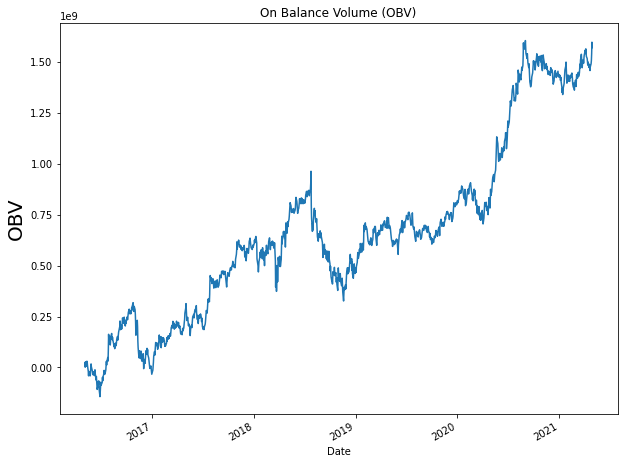

In [78]:
ax = df_obv["obv"].plot(title="On Balance Volume (OBV)")
ax.set_ylabel("OBV", size=20)
#ax.set_yscale('log')

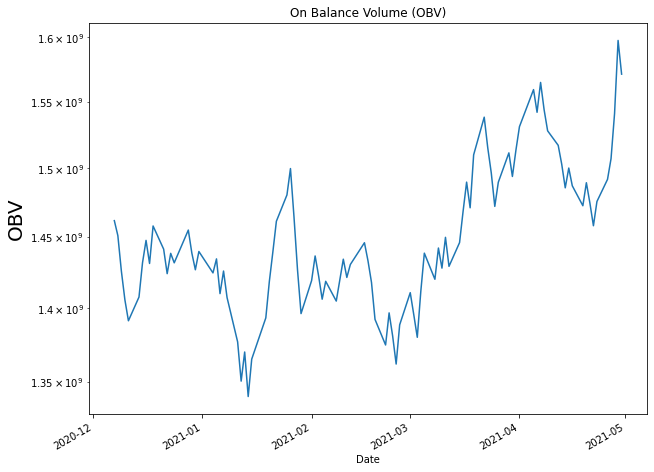

In [91]:
ax = df_obv['obv'].iloc[-100:].plot(title="On Balance Volume (OBV)")
ax.set_ylabel("OBV", size=20)
ax.set_yscale('log')